In [6]:
pip install --upgrade tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import Sequential
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory as load

In [6]:
# "E:\Data\animal_data"
dict_path = r"E:\Data\animal_data"

In [7]:
image_height = 244
image_width =244


In [8]:
train_ds = load(
    dict_path,
    labels='inferred',
    label_mode="int",
    color_mode="rgb",
    batch_size=16,
    image_size=(image_height,image_width),
    shuffle=True,
    seed=14,
    validation_split=0.1,
    subset='training'
)

Found 765 files belonging to 6 classes.
Using 689 files for training.


In [9]:
val_ds = load(
    dict_path,
    labels='inferred',
    label_mode="int",
    color_mode="rgb",
    batch_size=16,
    image_size=(image_height,image_width),
    shuffle=True,
    seed=14,
    validation_split=0.1,
    subset='validation'
)

Found 765 files belonging to 6 classes.
Using 76 files for validation.


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))


E:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 242, 242, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 121, 121, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 119, 119, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 57, 57, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,231,558 (12.33 MB)

 Trainable params: 3,231,558 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
print('%hist')

%hist


In [14]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.2614 - loss: 81.9129 - val_accuracy: 0.5658 - val_loss: 1.4009
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.7527 - loss: 0.9944 - val_accuracy: 0.7237 - val_loss: 1.4789
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9169 - loss: 0.5463 - val_accuracy: 0.7632 - val_loss: 1.9897
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9781 - loss: 0.1753 - val_accuracy: 0.7500 - val_loss: 2.6505
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.9849 - loss: 0.1004 - val_accuracy: 0.7763 - val_loss: 2.6315
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9757 - loss: 0.2042 - val_accuracy: 0.7237 - val_loss: 2.7371
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9711 - loss: 0.2169 - val_accuracy: 0.7895 - val_loss: 2.6969
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.9836 - loss: 0.1398 - val_accuracy: 

In [15]:
val_dsl

NameError: name 'val_dsl' is not defined

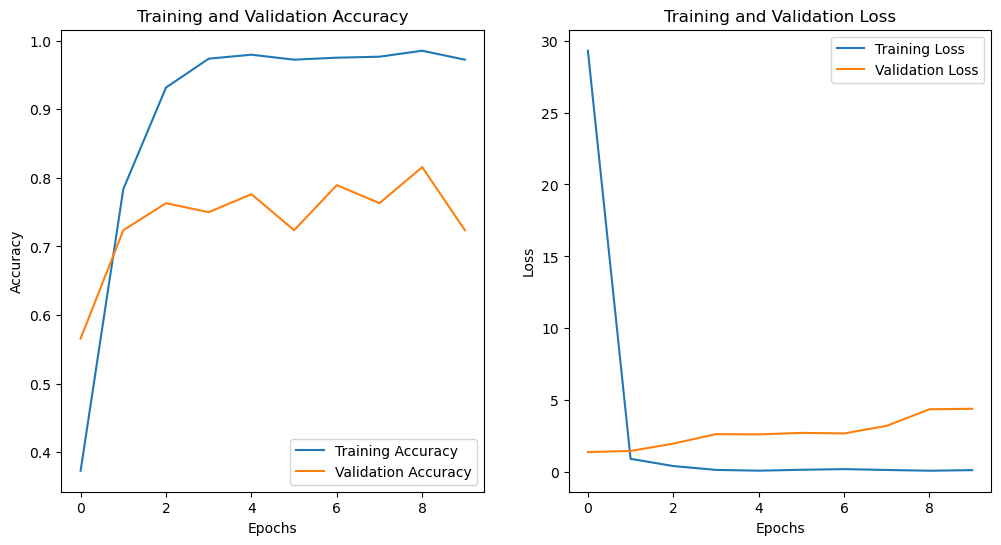

In [16]:
plt.figure(figsize=(12, 6))

# Plot training accuracy vs validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss vs validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = Sequential()
model.add(Conv2D(42, kernel_size=(6, 6), padding='valid', activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(42, kernel_size=(6, 6), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Conv2D(42, kernel_size=(6, 6), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 239, 239, 42)        │           4,578 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 119, 119, 42)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 114, 114, 42)        │          63,546 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 42)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 51, 51, 42)          │          63,546 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 25, 25, 42)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 26250)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,360,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,492,572 (13.32 MB)

 Trainable params: 3,492,572 (13.32 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 381ms/step - accuracy: 0.2034 - loss: 89.1117 - val_accuracy: 0.2763 - val_loss: 1.7567
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 373ms/step - accuracy: 0.2312 - loss: 1.7569 - val_accuracy: 0.2763 - val_loss: 1.8319
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 383ms/step - accuracy: 0.4226 - loss: 1.5857 - val_accuracy: 0.5789 - val_loss: 1.6354
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 375ms/step - accuracy: 0.5929 - loss: 1.2316 - val_accuracy: 0.5789 - val_loss: 1.5043
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 377ms/step - accuracy: 0.6830 - loss: 1.0057 - val_accuracy: 0.4868 - val_loss: 3.5483
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 377ms/step - accuracy: 0.7211 - loss: 1.1625 - val_accuracy: 0.6579 - val_loss: 1.4523
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 375ms/step - accuracy: 0.8000 - loss: 0.6621 - val_accuracy: 0.6579 - val_loss: 1.7490
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 17s 377ms/step - accuracy: 0.8758 - loss: 0.4692 - val_acc

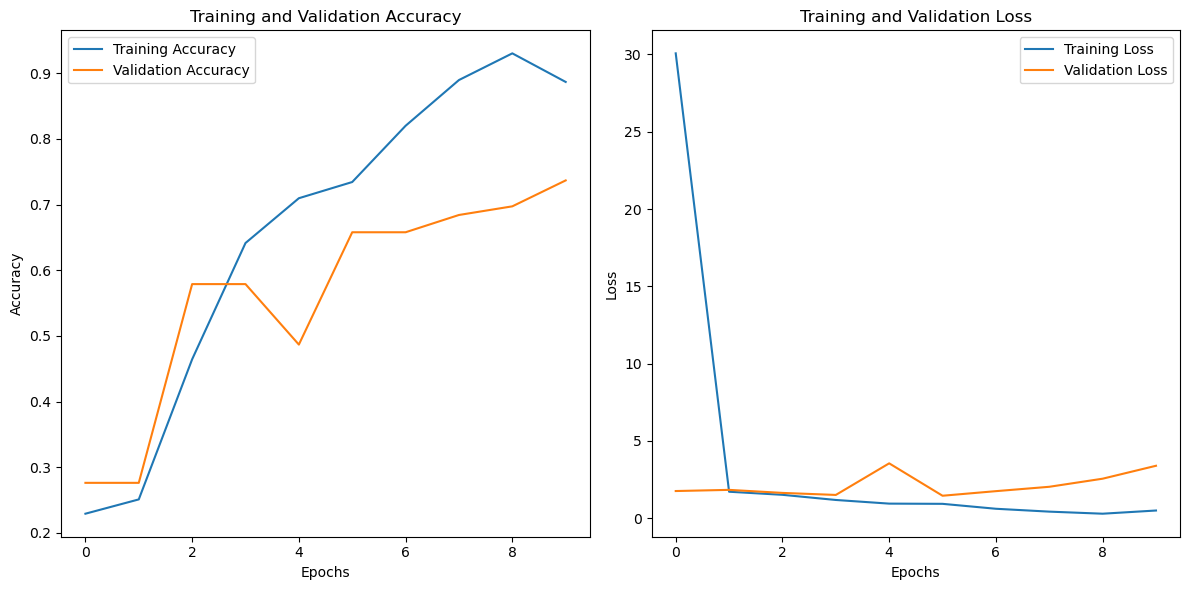

In [21]:
plt.figure(figsize=(12, 6))

# Plot training accuracy vs validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss vs validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()